In [6]:
# 7

# Daily time (in hours): [study, entertainment, sleep]
time_data = [
 (3.5, 2.0, 7.0), (5.0, 1.5, 6.5), (2.5, 3.0, 8.0),
 (4.0, 2.0, 6.0), (1.5, 4.5, 9.0), (3.0, 2.5, 7.5),
 (5.5, 1.0, 6.0), (2.0, 3.5, 8.5), (4.5, 2.0, 7.0),
 (3.0, 3.0, 7.5), (6.0, 1.5, 6.0), (2.5, 4.0, 8.0),
 (4.0, 2.5, 7.0), (5.0, 2.0, 6.5), (3.5, 2.5, 7.0)
 ]

In [7]:
 # task 1.1

low = []
moderate = []
high = []

In [8]:
# task 1.2

for data in time_data:
  if data[0] > 5.0:
    high.append(data[0])
  elif data[0] >= 3.0 and data[0] <= 5.0:
    moderate.append(data[0])
  else:
    low.append(data[0])

In [44]:
# task 1.3

print("Low study hours:", low)
print("Moderate study hours:", moderate)
print("High study hours:", high)

Low study hours: [2.5, 1.5, 2.0, 2.5]
Moderate study hours: [3.5, 5.0, 4.0, 3.0, 4.5, 3.0, 4.0, 5.0, 3.5]
High study hours: [5.5, 6.0]


In [10]:
# task 2.1

print("Number of days that had low study time:",len(low))

Number of days that had low study time: 4


In [12]:
# task 2.2

print("Number of days that had moderate study time:",len(moderate))

Number of days that had moderate study time: 9


In [13]:
# task 2.3

print("Number of days that had high study time:",len(high))

Number of days that had high study time: 2


In [11]:
# task 3

study_minutes = []

for data in time_data:
  study_minutes.append(data[0] * 60)

print(study_minutes)

[210.0, 300.0, 150.0, 240.0, 90.0, 180.0, 330.0, 120.0, 270.0, 180.0, 360.0, 150.0, 240.0, 300.0, 210.0]


In [14]:
# task 4.1

study_hours = []
entertainment_hours = []
sleep_hours = []

In [15]:
# task 4.2

for data in time_data:
  study_hours.append(data[0])
  entertainment_hours.append(data[1])
  sleep_hours.append(data[2])

In [19]:
# task 4.3

average_study_hours = sum(study_hours) / len(study_hours)
print(f"average hours spent studying = {average_study_hours:.2f}")

average_entertainment_hours = sum(entertainment_hours) / len(entertainment_hours)
print(f"average hours spent on entertainment = {average_entertainment_hours:.2f}")

average_sleep_hours = sum(sleep_hours) / len(sleep_hours)
print(f"average hours spent studying = {average_sleep_hours:.2f}")

average hours spent studying = 3.70
average hours spent on entertainment = 2.50
average hours spent studying = 7.17


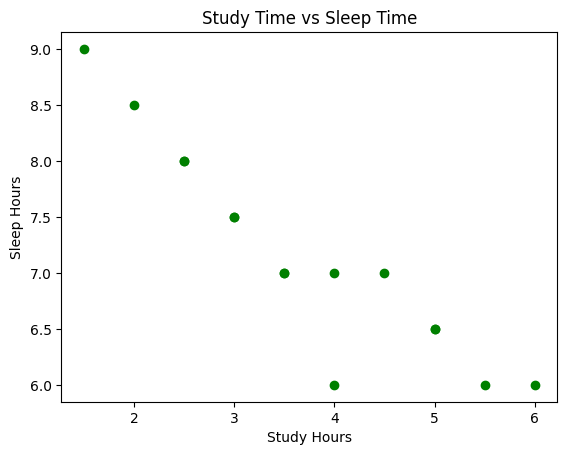

In [23]:
# task 5

import matplotlib.pyplot as plt
plt.scatter(study_hours, sleep_hours, color="green")
plt.xlabel("Study Hours")
plt.ylabel("Sleep Hours")
plt.title("Study Time vs Sleep Time")
plt.show()

In [35]:
# 8.1

# task 1

def sum_nested_list(nested_list):
    total = 0
    for element in nested_list:
        if type(element) == list:
            total += sum_nested_list(element)
        else:
            total += element
    return total

# sample nested list
nested_list = [1, [2, [3, 4], 5], 6, [7, 8]]

total = sum_nested_list(nested_list)
print("Sum of all numbers:", total)

Sum of all numbers: 36


In [45]:
# task 2

def generate_permutations(s):
    result = []
    used = [False] * len(s)
    
    def backtrack(path):
        if len(path) == len(s):
            result.append("".join(path))
            return
        
        for i in range(len(s)):
            if not used[i]:
                used[i] = True
                path.append(s[i])
                backtrack(path)
                path.pop()
                used[i] = False
    
    backtrack([])
    return list(set(result))

# testing with strings
print(generate_permutations("abc"))
print(generate_permutations("aab"))

['acb', 'bca', 'bac', 'abc', 'cab', 'cba']
['baa', 'aab', 'aba']


In [34]:
# task 3

def calculate_directory_size(directory):
    total = 0
    for key, value in directory.items():
        if isinstance(value, int):
            total += value
        else:
            total += calculate_directory_size(value)
    return total

# Sample directory structure
directory_structure = {
    "file1.txt": 200,
    "file2.txt": 300,
    "subdir1": {
        "file3.txt": 400,
        "file4.txt": 100
    },
    "subdir2": {
        "subsubdir1": {
           "file5.txt": 250
       },
       "file6.txt": 150
    }
}

# testing with sample directory structure
print("The total directory size is:", calculate_directory_size(directory_structure), "KB")

The total directory size is: 1400 KB


In [39]:
# 8.2

# task 1

def min_coins(coins, amount):
    """
    Calculates the minimum number of coins needed to total to a given amount 
    using dynamic programming.

    Parameters:
        coins (list[int]): Available coin denominations.
        amount (int): Target total amount.

    Returns:
        int: Minimum number of coins needed. If impossible, -1 is returned.

    Example:
        min_coins([1, 2, 5], 11) -> 3
        min_coins([5], 2) -> -1
    """

    dp = [float('inf')] * (amount + 1)
    dp[0] = 0

    for coin in coins:
        for i in range(coin, amount + 1):
            dp[i] = min(dp[i], dp[i - coin] + 1)

    return dp[amount] if dp[amount] != float('inf') else -1


# testing with given coins and amount
coins = [1, 2, 5]
amount = 11
minimum = min_coins(coins, amount)
print("Mininum number of coins required:",minimum)

Mininum number of coins required: 3


In [41]:
# task 2

def longest_common_subsequence(text1, text2):
    len1 = len(text1)
    len2 = len(text2)

    grid = [[0] * (len2 + 1) for _ in range(len1 + 1)]

    for r in range(1, len1 + 1):
        for c in range(1, len2 + 1):
            if text1[r - 1] == text2[c - 1]:
                grid[r][c] = grid[r - 1][c - 1] + 1
            else:
                top = grid[r - 1][c]
                left = grid[r][c - 1]
                grid[r][c] = top if top > left else left

    return grid[len1][len2]

# testing with strings
print(longest_common_subsequence("abcde", "ace"))

3


In [43]:
# task 3

def knapsack(weights, values, capacity):
    num_items = len(weights)

    dp = [[0] * (capacity + 1) for _ in range(num_items + 1)]

    for item_index in range(1, num_items + 1):
        for current_capacity in range(1, capacity + 1):
            item_weight = weights[item_index - 1]
            item_value = values[item_index - 1]

            if item_weight > current_capacity:
                dp[item_index][current_capacity] = dp[item_index - 1][current_capacity]
            else:
                value_if_skipped = dp[item_index - 1][current_capacity]
                value_if_taken = dp[item_index - 1][current_capacity - item_weight] + item_value
                dp[item_index][current_capacity] = max(value_if_skipped, value_if_taken)

    return dp[num_items][capacity]

# testing with given values
weights = [1, 3, 4, 5]
values = [1, 4, 5, 7]
capacity = 7
print(knapsack(weights, values, capacity))

9
